In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [2]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None,
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
data_0, label_0 = train_data[0]
data_0, label_0

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
data_0.shape, label_0, class_names[label_0]

(torch.Size([1, 28, 28]), 9, 'Ankle boot')

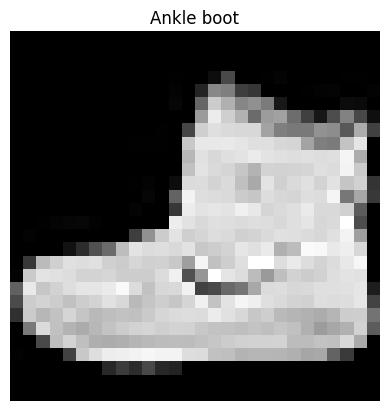

In [8]:
import matplotlib.pyplot as plt

plt.imshow(data_0.squeeze(), cmap="gray")
plt.title(class_names[label_0])
plt.axis(False);

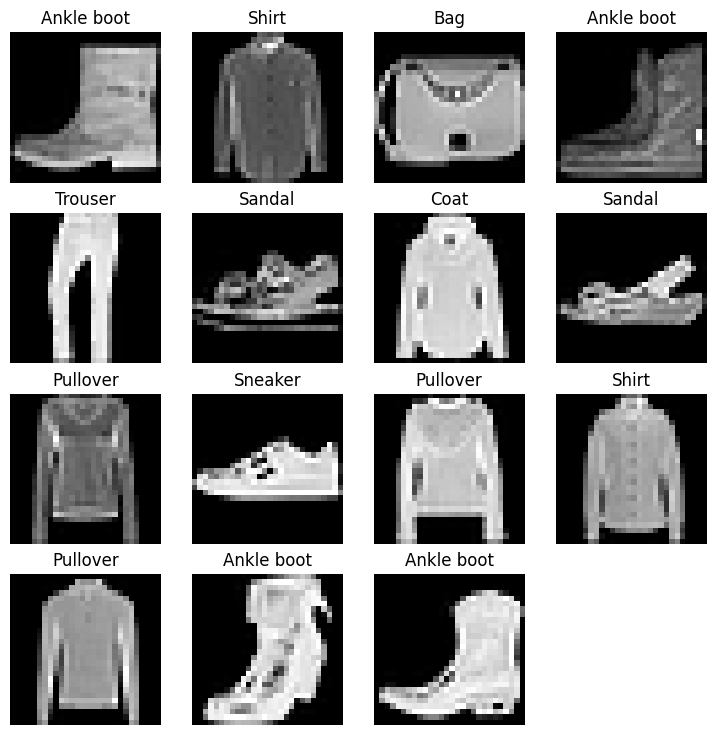

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols*+1):
    random_idx = torch.randint(0, len(train_data), size=(1,)).item()
    img, labeel = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[labeel])
    plt.axis(False);

In [10]:
### dataloader

from torch.utils.data import dataloader

BATCH_SIZE = 32

train_dataloader = dataloader.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = dataloader.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [11]:
print(f"Dataloaders: {len(train_dataloader)}, {len(test_dataloader)}")

Dataloaders: 1875, 313


In [12]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


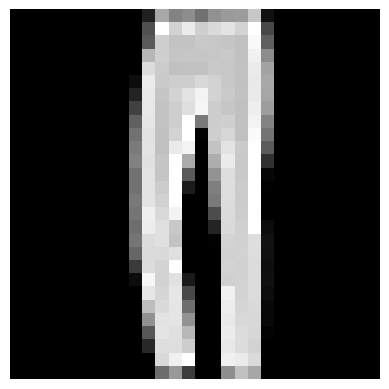

In [13]:
torch.manual_seed(42),
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [14]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [15]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784, hidden_units=10, output_shape=len(class_names)
).to("cpu")

dummy_input = torch.rand([1, 1, 28, 28])
model_0(dummy_input)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [16]:
# Baseline experiment 

from helper_functions import accuracy_fn
from timeit import default_timer

from tqdm.auto import tqdm

def print_train_time(start: float, end: float, device: str) -> None:
    """Prints difference between start and end time.
    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.
    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = default_timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------------------")

    # Train loop
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch + 1) % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)

    # Test loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_test, test_pred.argmax(dim=1))
        
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"Epoch: {epoch} |Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

end_time = default_timer()
tr_time_model_0 = print_train_time(start_time, end_time, device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Looked at 12768/60000 samples.
Looked at 25568/60000 samples.
Looked at 38368/60000 samples.
Looked at 51168/60000 samples.
Epoch: 0 |Train Loss: 0.46516 | Test Loss: 0.50954, Test Accuracy: 82.04%
Epoch: 1
-------------------------------
Looked at 12768/60000 samples.
Looked at 25568/60000 samples.
Looked at 38368/60000 samples.
Looked at 51168/60000 samples.
Epoch: 1 |Train Loss: 0.60148 | Test Loss: 0.47989, Test Accuracy: 83.20%
Epoch: 2
-------------------------------
Looked at 12768/60000 samples.
Looked at 25568/60000 samples.
Looked at 38368/60000 samples.
Looked at 51168/60000 samples.
Epoch: 2 |Train Loss: 0.31823 | Test Loss: 0.47664, Test Accuracy: 83.43%

Train time on cpu: 14.014 seconds


In [17]:
# Get model 0 results

torch.manual_seed(42)

def eval_model(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn: torch.nn.Module, device) -> dict:
    loss, accuracy = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(dataloader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            accuracy += accuracy_fn(y_true=y, 
                                    y_pred=y_pred.argmax(dim=1))
        
        loss /= len(dataloader)
        accuracy /= len(dataloader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_accuracy": accuracy
    }

model_0_results = eval_model(model_0, train_dataloader, loss_fn, accuracy_fn, "cpu")
model_0_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.43026089668273926,
 'model_accuracy': 84.94166666666666}

In [18]:
# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [19]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784, hidden_units=10, output_shape=len(class_names)
).to(device)



In [20]:
x, y = next(iter(train_dataloader))
y

tensor([3, 9, 6, 9, 4, 9, 9, 4, 2, 9, 5, 7, 8, 4, 7, 2, 9, 0, 8, 4, 2, 1, 5, 9,
        0, 8, 3, 3, 4, 5, 6, 3])

In [21]:
len(y)

32

In [22]:
def print_train_time(start: float, end: float, device: str) -> None:
    """Prints difference between start and end time.
    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.
    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

def train_step(model: torch.nn.Module, 
            data_loader: torch.utils.data.DataLoader, 
            loss_fn: torch.nn.Module,       
            optimizer: torch.optim.Optimizer, 
            accuracy_fn,
            device: torch.device = device) -> None:

    model.train()

    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        train_acc += accuracy_fn(y_true=y, 
                                    y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # Update the parameters once per batch

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f}, Train accuracy: {train_acc:.2f}")

def test_step(model: torch.nn.Module,
            data_loader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            accuracy_fn,
            device: torch.device = device) -> None:

    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            
            y_pred = model(X)
            test_loss += loss_fn(y_pred, y)
            test_acc += accuracy_fn(y_true=y,
                                    y_pred=y_pred.argmax(dim=1))

    test_loss = test_loss / len(data_loader)
    test_acc = test_acc / len(data_loader)
    print(f"Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}")

In [23]:
from helper_functions import accuracy_fn
from timeit import default_timer

from tqdm.notebook import tqdm


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = default_timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------------------")

    # Train loop
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)

    # Test loop
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn)

end_time = default_timer()
tr_time_model_1 = print_train_time(start_time, end_time, device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Train loss: 1.09199, Train accuracy: 61.34
Test loss: 0.95636, Test accuracy: 65.00
Epoch: 1
-------------------------------
Train loss: 0.78101, Train accuracy: 71.93
Test loss: 0.72227, Test accuracy: 73.91
Epoch: 2
-------------------------------
Train loss: 0.67027, Train accuracy: 75.94
Test loss: 0.68500, Test accuracy: 75.02

Train time on cuda:0: 19.610 seconds


In [24]:
model_1_results = eval_model(model_1, train_dataloader, loss_fn, accuracy_fn, device)
model_1_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6430185437202454,
 'model_accuracy': 76.42833333333333}

In [25]:
# very nice source for cnn explanation: https://github.com/poloclub/cnn-explainer

In [26]:
class FashionMNISTModelV2(nn.Module):
    """Replicates TinyVGG Model."""
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.classifier(x)
        return x
    
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(
    input_shape=1, hidden_units=10, output_shape=len(class_names)
).to(device)

# model_2

In [27]:
from helper_functions import accuracy_fn
from timeit import default_timer

from tqdm.notebook import tqdm


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = default_timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------------------------------")

    # Train loop
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn)

    # Test loop
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn)

end_time = default_timer()
tr_time_model_2 = print_train_time(start_time, end_time, device=str(next(model_2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------------------------
Train loss: 0.59337, Train accuracy: 78.44
Test loss: 0.39171, Test accuracy: 86.04
Epoch: 1
-------------------------------
Train loss: 0.36313, Train accuracy: 86.92
Test loss: 0.35663, Test accuracy: 87.11
Epoch: 2
-------------------------------
Train loss: 0.32662, Train accuracy: 88.20
Test loss: 0.31734, Test accuracy: 88.56

Train time on cuda:0: 23.471 seconds


In [28]:

model_2_results = eval_model(model_2, train_dataloader, loss_fn, accuracy_fn, device)
model_2_results

  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.286261647939682,
 'model_accuracy': 89.89333333333333}

In [29]:
import pandas as pd
compare_results = pd.DataFrame([
    model_0_results, model_1_results, model_2_results
])
compare_results["training_time"] = [tr_time_model_0, tr_time_model_1, tr_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModelV0,0.430261,84.941667,14.013764
1,FashionMNISTModelV1,0.643019,76.428333,19.610340
2,FashionMNISTModelV2,0.286262,89.893333,23.470601


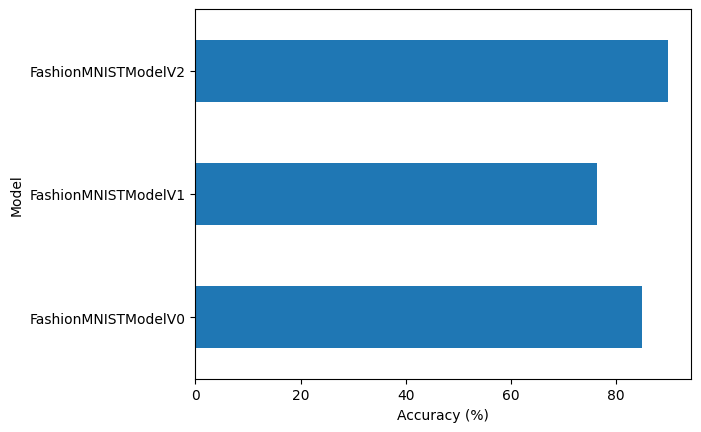

In [30]:
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

In [31]:
def make_predictions(model: torch.nn.Module, 
                    data: list, 
                    device: torch.device = device) -> None:
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)



Text(0.5, 1.0, 'Sandal')

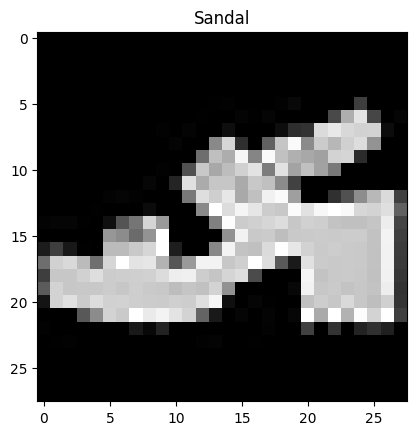

In [32]:
import random 
random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [33]:
pred_probs = make_predictions(model_2, test_samples)

pred_probs

tensor([[5.4129e-08, 9.8212e-09, 1.3164e-08, 4.4427e-09, 6.2222e-09, 9.9992e-01,
         9.8337e-08, 1.0066e-06, 5.0103e-06, 7.2708e-05],
        [3.0649e-02, 7.2707e-01, 3.7215e-04, 4.7576e-02, 1.3593e-01, 8.0011e-05,
         5.7624e-02, 3.7147e-04, 7.6533e-05, 2.5930e-04],
        [6.9237e-06, 4.2675e-07, 3.8193e-06, 5.5993e-06, 8.9206e-07, 1.5035e-03,
         3.8333e-06, 8.2548e-01, 9.7018e-04, 1.7203e-01],
        [1.4523e-03, 3.0375e-04, 2.2980e-01, 1.8506e-03, 7.6415e-01, 2.4302e-06,
         2.3254e-03, 6.2203e-06, 8.7798e-05, 2.2808e-05],
        [1.0584e-01, 1.5759e-05, 1.4372e-04, 8.8198e-01, 1.0983e-03, 1.1542e-07,
         1.0790e-02, 3.3552e-06, 1.0665e-04, 1.3503e-05],
        [6.9397e-01, 2.1169e-05, 7.9027e-04, 6.0055e-03, 5.8538e-03, 2.1133e-07,
         2.9283e-01, 2.8519e-07, 5.2431e-04, 3.1430e-07],
        [7.3431e-05, 3.1877e-05, 1.2038e-02, 3.1257e-06, 9.8089e-01, 1.8504e-07,
         6.8624e-03, 3.0127e-07, 9.3455e-05, 2.8823e-06],
        [9.1737e-07, 4.3521

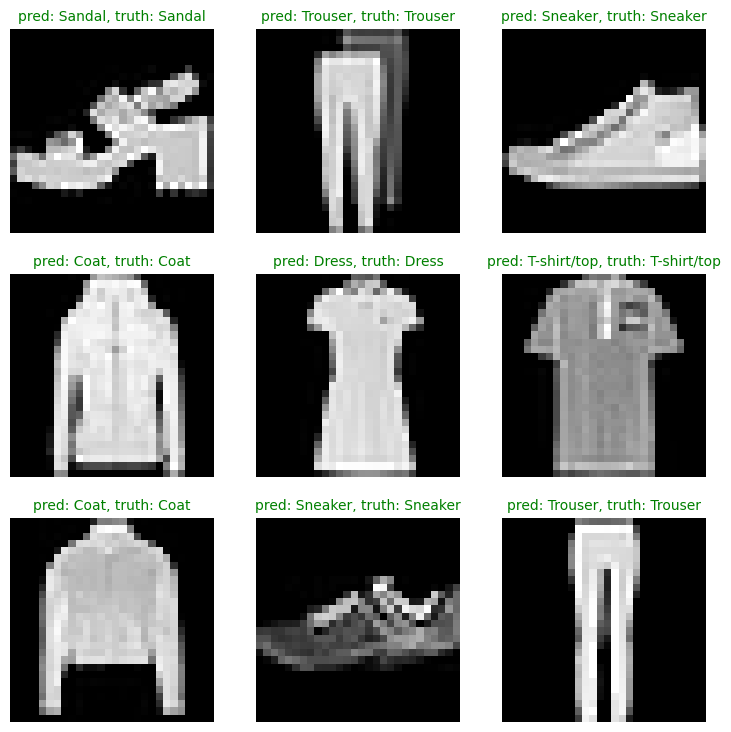

In [34]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    pred_label = class_names[pred_probs[i].argmax()]
    truth_label = class_names[test_labels[i]]
    title_text = f"pred: {pred_label}, truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, color="g")
    else:
        plt.title(title_text, fontsize=10, color="r")
    plt.axis("off")
plt.show()

In [47]:
y_preds = []

model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Predicting"):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:5]

Predicting:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6])

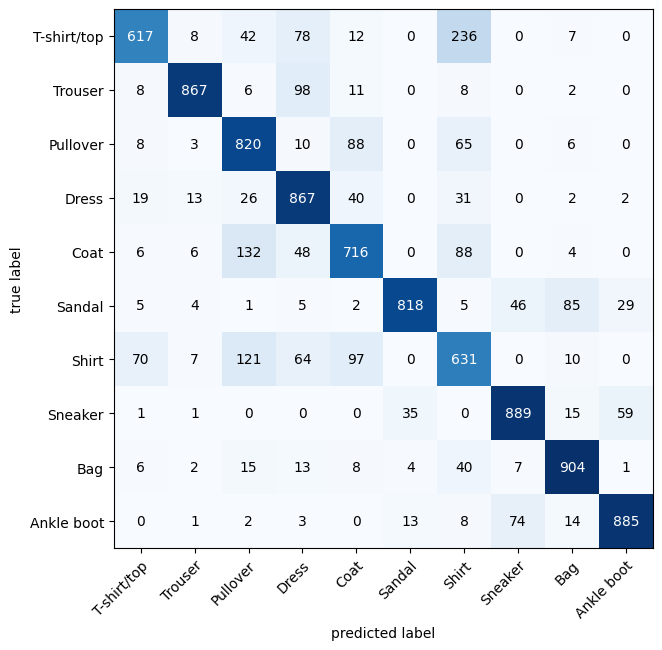

In [52]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7)
 )


In [55]:
from pathlib import Path

MODELS_PATH = Path("models")
MODELS_PATH.mkdir(exist_ok=True, parents=True)

MODEL_NAME = "3_conv_2.pth"

MODEL_SAVE_PATH = MODELS_PATH / MODEL_NAME

print(f"Saving model in {MODEL_SAVE_PATH}")
torch.save(model_2.state_dict(), MODEL_SAVE_PATH)

Saving model in models\3_conv_2.pth


In [56]:
torch.manual_seed(42)

loaded_model = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model.to(device)

loaded_model_results = eval_model(loaded_model, train_dataloader, loss_fn, accuracy_fn, device)
loaded_model_results


  0%|          | 0/1875 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.28626179695129395,
 'model_accuracy': 89.89333333333333}

In [57]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.286261647939682,
 'model_accuracy': 89.89333333333333}

In [58]:
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_results["model_loss"]), atol=1e-02)

tensor(True)